# Assignment 2: Regresssion

## Generate dataset

This code cell is responsible for generating an artificial dataset on which we perform analysis and regression problems.

### Description
The dataset contains 100 sample records and comprises of four features $x_1$, $x_2$, $x_3$, $x_4$ and target value $y$.
Each $x_i$ is a generated from a uniform RNG which generates numbers between $[-5, 5]$.

#### Generatiom of target values
Rather than using an arbitrary RNG for generating target $y$ values which might produce outliers, we specifically
compute them such that it is better tailored for regression problems.

We start off by generating an arbitrary weights vector $w$ sampled from a uniform RNG of $[-1, 1]$.
Then for each $X$ record, we take the dot product of the feature map of $X$ and $w$. This produces a scaler that is the target $y$ value for that record.

In [11]:
import numpy as np

n_samples = 100
n_inputs = 4
filename = "dataset.csv"

np.random.seed(42)
X = np.random.uniform(-5, 5, (n_samples, n_inputs))

def generate_y_values(X):
    w = np.random.uniform(-1, 1, 15)
    
    y = []
    for x in X:
        x1, x2, x3, x4 = x
        phi = [
            1,
            x1, x2, x3, x4,
            x1**2, x2**2, x3**2, x4**2,
            x1*x2, x1*x3, x1*x4,
            x2*x3, x2*x4, x3*x4
        ]
        y.append(np.dot(phi, w))
    return np.array(y)

y = generate_y_values(X)

dataset = np.column_stack((X, y))

np.savetxt(filename, dataset, delimiter=",", header="x1,x2,x3,x4,y")

print(f"Successfully saved {n_samples} samples to {filename}")

Successfully saved 100 samples to dataset.csv


## Load Dataset

In [9]:
import numpy as np

data = np.genfromtxt('dataset.csv', delimiter=',', skip_header=1)

X = data[:, :4]
y = data[:, 4]

## Generate Feature Map

The feature map transforms the input vector $X$ into a higher dimensional space where the non-linearity of the dataset can be modelled into a linear relationship.

The feature map is a vector whose size depend of the number of input features $d$ and required degree of polynomial $p$. The size is given by
$$
n = \binom{d + p}{p}
$$

For a dataset of 4 features (as generated before) and polynomial degree 2, the feature map has a length of 15.

In [10]:
def calculate_feature_map(X):
    N = X.shape[0]
    Phi = np.zeros((N, 15))
    
    for i in range(N):
        x1, x2, x3, x4 = X[i]
        phi_row = [
            1,
            x1, x2, x3, x4,
            x1**2, x2**2, x3**2, x4**2,
            x1*x2, x1*x3, x1*x4,
            x2*x3, x2*x4, 
            x3*x4
        ]
        Phi[i, :] = phi_row
        
    return Phi

Phi = calculate_feature_map(X)

print(f"Shape of original input X: {X.shape}")
print(f"Shape of feature map Phi: {Phi.shape}")
print(f"Dimension of phi(x): {Phi.shape[1]}")

Shape of original input X: (100, 4)
Shape of feature map Phi: (100, 15)
Dimension of phi(x): 15


## Cost function
We use a mean squared error approaach to calculate the errors

In [4]:
N, D = Phi.shape 

w = np.zeros(D)

def compute_cost(Phi, y, w):
    predictions = Phi @ w
    errors = predictions - y
    cost = (1 / (2 * N)) * np.sum(errors**2)
    return cost

initial_cost = compute_cost(Phi, y, w)

print(f"Decision Variable w Dimension: {w.shape[0]}") 
print(f"Initial Cost with zero weights: {initial_cost:.4f}")

Decision Variable w Dimension: 15
Initial Cost with zero weights: 159.0396


## Gradient of the Cost function

The derivative of the mean-squared error cost function is
$$
\nabla_w J(w) = \frac{1}{N} \Phi^T \cdot (\Phi w - y)
$$

In [5]:
def compute_gradient(Phi, y, w):
    N = len(y)
    predictions = Phi @ w
    error = predictions - y
    gradient = (1/N) * (Phi.T @ error)
    return gradient

D = Phi.shape[1]
w_current = np.zeros(D)
grad = compute_gradient(Phi, y, w_current)

print(f"Gradient vector shape: {grad.shape}")
print(f"Gradient: {grad}")

Gradient vector shape: (15,)
Gradient: [  -3.66837953    0.54893695   -7.14272155   -4.18312741    6.66303949
 -103.8201483   -31.368363     16.78735677  -70.36197739   55.21978481
   20.73157586  -43.88773544  -66.18781127  -42.76360873  -36.09771729]


## Verifying the optimal weights

- First we cslculate the optimal weights
- THen doing the predictions based on the obtained weights
- Next we take the actual values and computed predictions and calculate the absolute error between those
- Finally we plot them using `matplotlib`

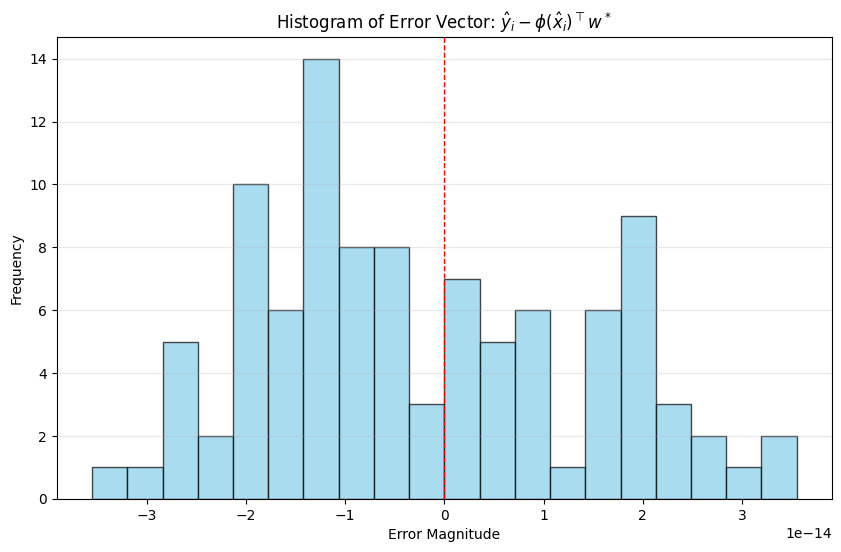

In [6]:
import matplotlib.pyplot as plt

w_star = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)

predictions = Phi @ w_star
error_vector = y - predictions

# 3. Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(error_vector, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.title(r'Histogram of Error Vector: $\hat{y}_i - \phi(\hat{x}_i)^\top w^*$')
plt.xlabel('Error Magnitude')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()